## BUSINESS UNDERSTANDING (PREDICTING SEPSIS WITH FastAPI)
### INTRODUCTION
Sepsis is a medical condition caused by the body's response to infection. This life-threatening condition can lead to tissue damage, organ failure or dysfunction and death if not attended to on time. The challenge lies in identifying sepsis early in its course when interventions can be most effective. Hence, early detection and prompt intervention are critical to improving patient outcome and reduction of mortality rates.
In this project, a predictive model for sepsis detection will be developed. The model will utilize features like Plasma glucoselevel, Blood Work Result-1, Blood Pressure, Blood Work Result-2, Blood Work Result-3, Body mass index, Blood Work Result-4, Patient's age and the presence of insurance. 

### GOAL
The aim of this project is to develop a FastAPI application which will be used for predicting sepsis in patients. This app will employ machine learning models trained on clinical data.

### STAKEHOLDERS
Stakeholders for this FastAPI app includes;
•	Physicians, nurses, and other healthcare professionals working in hospitals, emergency departments, and intensive care units.
•	Healthcare administrators and policymakers involved in quality improvement initiatives and resource allocation.
•	Researchers and clinicians interested in sepsis management and predictive analytics.

### DATA SOURCE & DESCRIPTION
This dataset is a modified version of a publicly available data source obtained from John Hopkins University.
Below are column headings and their descriptions.

ID:Unique number to represent patient ID

PRG:Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise 

### HYPOTHESIS:
**Null Hypothesis (H0):**
*There is no significant difference in Blood_Pressure and BMI between patients with and without sepsis.*

**Alternative Hypothesis (H1):**
*There is a significant difference in Blood_Pressure and BMI between patients with and without sepsis.*

### ANALYTICAL QUESTIONS:
1. *Investigate the distribution of plasma glucose levels among patients with and without Sepsis*

2. *Compare the distribution of Blood Work Results for patients with and without Sepsis*

3. *Examine the relationship between blood pressure values and the occurance of Sepsis*

4. *Analyze the distribution of Body Mass Index among individuals with and without Sepsis*

5. *Explore the age distribution of patients with Sepsis compared to those without*

6. *Determine the percentage of patients with valid insurance among those with and without Sepsis*

7. *Assess how well combined factors predict Sepsis occurrence*

8. *Evaluate the accuracy of the predictive model in ideentifying Sepsis based on selected features*


### DATA UNDERSTANDING

In [232]:
#Importing necessary packages to work with

#For interacting with the operating system
import os

#For data manipulation
import pandas as pd 
import numpy as np

#For statistical and interactive data visualization
import seaborn as sns  
import matplotlib.pyplot as plt
import altair as alt


#For statistical functions
import scipy.stats as stats
from scipy.stats import ttest_ind



#For modeling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imblearn_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.metrics import roc_curve, auc
import altair as alt
from sklearn.metrics import classification_report

import joblib



### LOADING & EXPLORATIVE DATA ANALYSIS 

In [137]:
#To load dataset
Train_data = pd.read_csv("./Dataset/Paitients_Files_Train.csv")
Test_data = pd.read_csv("./Dataset/Paitients_Files_Test.csv")

In [138]:
#To view 5 rows of train dataset
Train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [11]:
#To view 5 rows of test datasets
Test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [12]:
#To view shape of train and test dataset
print("Shape of Train Dataset", Train_data.shape)
print("Shape of Test Dataset", Test_data.shape)

Shape of Train Dataset (599, 11)
Shape of Test Dataset (169, 10)


In [13]:
#To check columns in Train Dataset and their datatypes
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


### Data Types:

- The 'ID' column is of type object, which is suitable for unique identifiers.
- The 'Sepssis' column is also of type object, which suggests it might contain categorical data.
- There is an excess of zero values in every column.
- The target variable 'Sepsis' may exhibit imbalanced class distribution.
- Several numerical columns contain numerous outliers.
- Potential correlations among predictor variables may lead to multicollinearity.


In [15]:
#To check for null or missing values
Train_data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Missing Values
No missing values seen in the dataset. However, it is essential to verify if missing values are encoded differently such as using placeholder values like '-1' or '999'.


In [17]:
#To view data summary
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [19]:
#To check for duplicates
Train_data.duplicated().sum()

0

In [20]:
#To display unique values in each column
for column in Train_data.columns:
    unique_values = Train_data[column].unique()
    print(f"Unique values in {column} : {unique_values}")

Unique values in ID : ['ICU200010' 'ICU200011' 'ICU200012' 'ICU200013' 'ICU200014' 'ICU200015'
 'ICU200016' 'ICU200017' 'ICU200018' 'ICU200019' 'ICU200020' 'ICU200021'
 'ICU200022' 'ICU200023' 'ICU200024' 'ICU200025' 'ICU200026' 'ICU200027'
 'ICU200028' 'ICU200029' 'ICU200030' 'ICU200031' 'ICU200032' 'ICU200033'
 'ICU200034' 'ICU200035' 'ICU200036' 'ICU200037' 'ICU200038' 'ICU200039'
 'ICU200040' 'ICU200041' 'ICU200042' 'ICU200043' 'ICU200044' 'ICU200045'
 'ICU200046' 'ICU200047' 'ICU200048' 'ICU200049' 'ICU200050' 'ICU200051'
 'ICU200052' 'ICU200053' 'ICU200054' 'ICU200055' 'ICU200056' 'ICU200057'
 'ICU200058' 'ICU200059' 'ICU200060' 'ICU200061' 'ICU200062' 'ICU200063'
 'ICU200064' 'ICU200065' 'ICU200066' 'ICU200067' 'ICU200068' 'ICU200069'
 'ICU200070' 'ICU200071' 'ICU200072' 'ICU200073' 'ICU200074' 'ICU200075'
 'ICU200076' 'ICU200077' 'ICU200078' 'ICU200079' 'ICU200080' 'ICU200081'
 'ICU200082' 'ICU200083' 'ICU200084' 'ICU200085' 'ICU200086' 'ICU200087'
 'ICU200088' 'ICU200089' 'ICU

### Column Names:

The column names are not very descriptive. It's recommended to rename the columns to more meaningful names for better clarity and interpretability.

In [21]:
# Calculate outliers
outliers = {}

for col in Train_data.columns:
    if Train_data[col].dtype != 'object':
        Q1 = Train_data[col].quantile(0.25)
        Q3 = Train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = Train_data[(Train_data[col] < lower_bound) | (Train_data[col] > upper_bound)][col].tolist()
        outliers[col] = col_outliers

# Display outliers
for col, col_outliers in outliers.items():
    print(f"Outliers in {col}: {col_outliers}")

Outliers in PRG: [15, 17, 14, 14]
Outliers in PL: [0, 0, 0, 0, 0]
Outliers in PR: [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24]
Outliers in SK: [99]
Outliers in TS: [543, 846, 342, 495, 325, 485, 495, 318, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 310, 474, 328, 480, 326, 330, 600]
Outliers in M11: [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0]
Outliers in BD2: [2.288, 1.441, 1.39, 1.893, 1.781, 1.4, 1.321, 2.329, 1.318, 1.353, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699]
Outliers in Age: [69, 65, 66, 65, 65, 67, 72, 81, 67, 66, 67, 66]
Outliers in Insurance: []


<Axes: >

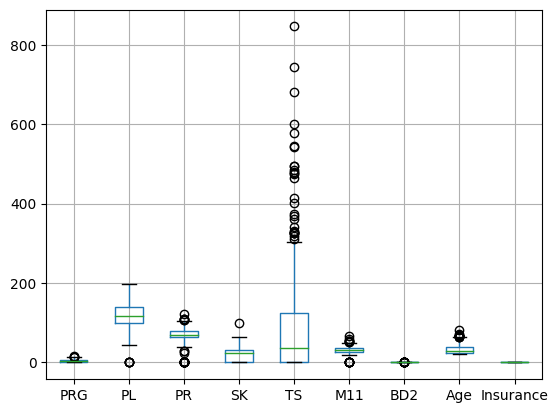

In [25]:
#To visualize outliers
Train_data.boxplot()

### Outliers:

Outliers are detected in several numerical columns like 'PRG', 'PR', 'SK', 'TS', 'M11', 'BD2', and 'Age'. Outliers can significantly affect model performance and need to be addressed. One approach could be to cap or clip the outliers to a certain threshold, or using techniques like Winsorization to replace them with more reasonable values.

In [31]:
# Calculate Q1, Q3, and IQR
numeric_columns = Train_data.select_dtypes(include=[np.number]).columns
num_df = Train_data[numeric_columns]
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
cleaned_df = num_df[~((num_df < lower_bound) | (num_df > upper_bound)).any(axis=1)]

# Print the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", cleaned_df.shape)

Shape of cleaned DataFrame: (493, 9)


In [175]:
#To drop ID Column in dataframe
Train_data.drop(columns=['ID'], inplace=True)


In [169]:
#Rename the column names to be more meaningful
Train_data = Train_data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target_Sepsis"
})



In [170]:
#View new named columns
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              599 non-null    object 
 1   Plasma_glucose  599 non-null    int64  
 2   Blood_Work_R1   599 non-null    int64  
 3   Blood_Pressure  599 non-null    int64  
 4   Blood_Work_R2   599 non-null    int64  
 5   Blood_Work_R3   599 non-null    int64  
 6   BMI             599 non-null    float64
 7   Blood_Work_R4   599 non-null    float64
 8   Patient_age     599 non-null    int64  
 9   Insurance       599 non-null    int64  
 10  Target_Sepsis   599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [171]:
# Replace zeros in each column with the median value
columns_with_zeros = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4']
for col in columns_with_zeros:
    median_val = Train_data[col].median()
    Train_data[col] = Train_data[col].replace(0, median_val)

### Univariate Analysis

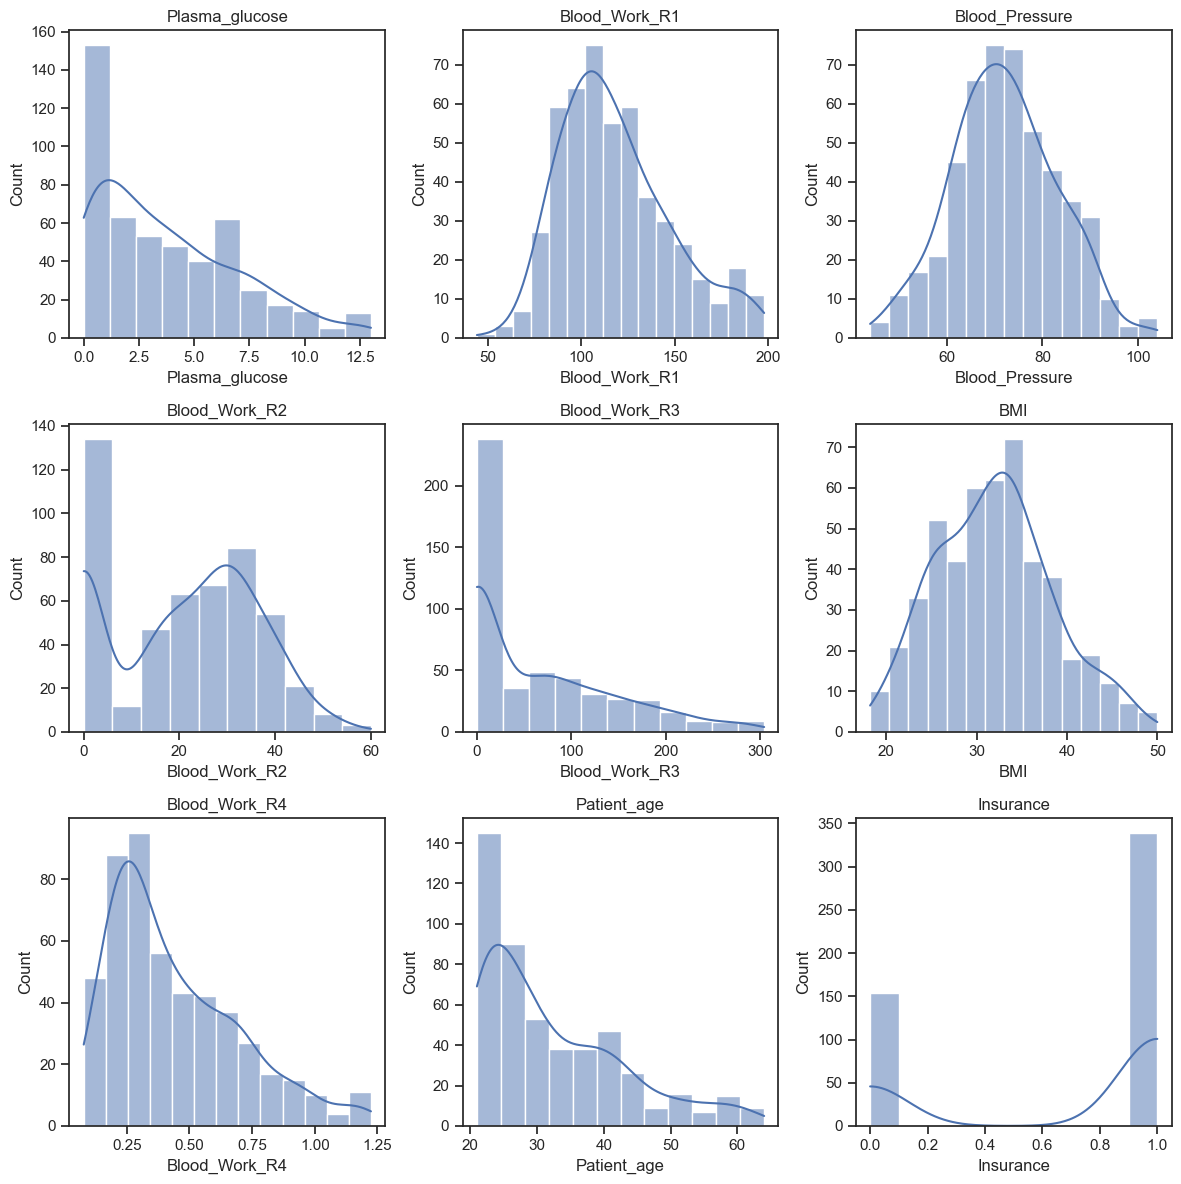

In [33]:
# Set the style for the plot
sns.set(style="ticks", color_codes=True)

# Create a grid of 3 by 3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(cleaned_df.columns):
    sns.histplot(cleaned_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

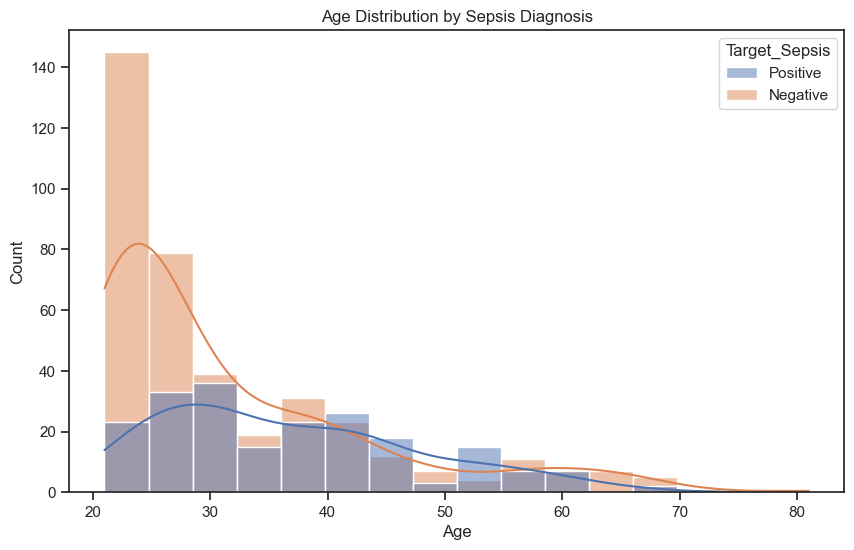

In [35]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=Train_data, x='Patient_age', kde=True, hue='Target_Sepsis')
plt.title('Age Distribution by Sepsis Diagnosis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

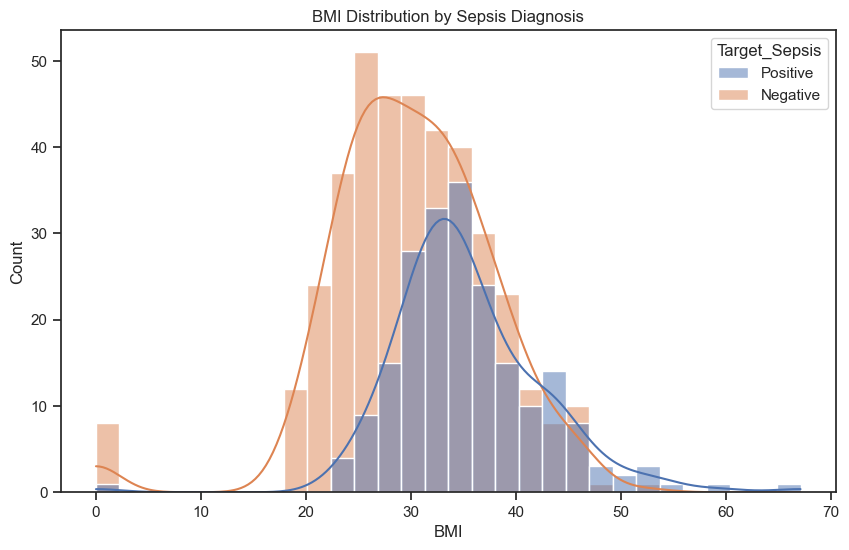

In [36]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=Train_data, x='BMI', kde=True, hue='Target_Sepsis')
plt.title('BMI Distribution by Sepsis Diagnosis')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### Multivariate Analysis

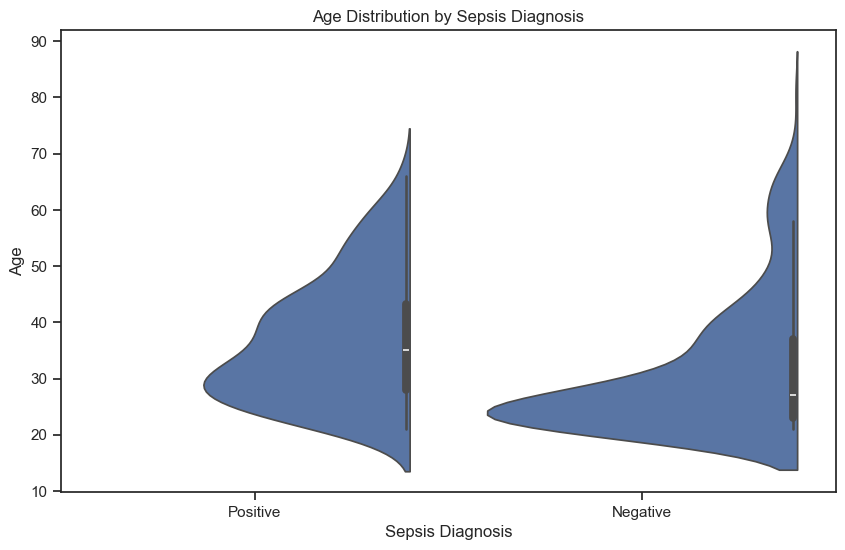

In [39]:
# Age vs. Sepsis
plt.figure(figsize=(10, 6))
sns.violinplot(Train_data, x='Target_Sepsis', y='Patient_age', split=True)
plt.title('Age Distribution by Sepsis Diagnosis')
plt.xlabel('Sepsis Diagnosis')
plt.ylabel('Age')
plt.show()

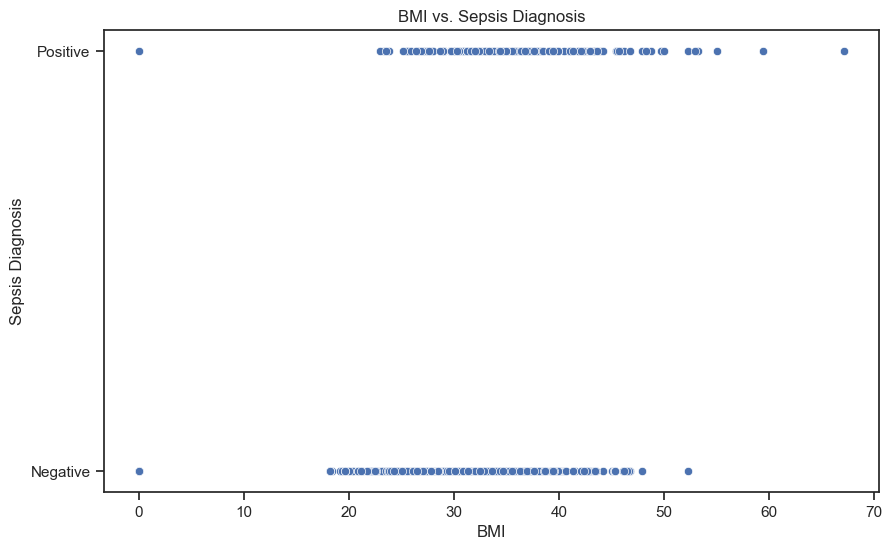

In [38]:
# BMI vs. Sepsis
plt.figure(figsize=(10, 6))
sns.scatterplot(Train_data, x='BMI', y='Target_Sepsis')
plt.title('BMI vs. Sepsis Diagnosis')
plt.xlabel('BMI')
plt.ylabel('Sepsis Diagnosis')
plt.show()

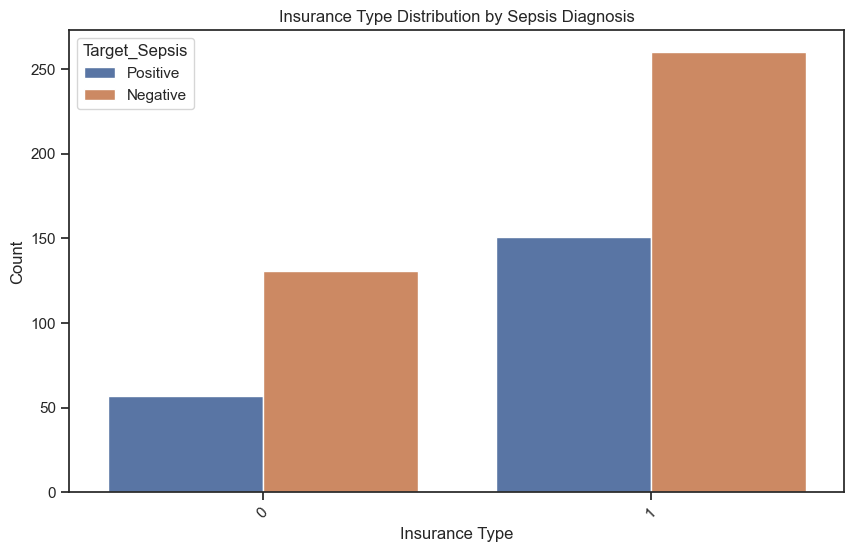

In [40]:
# Insurance type vs. Sepsis
plt.figure(figsize=(10, 6))
sns.countplot(Train_data, x='Insurance', hue='Target_Sepsis')
plt.title('Insurance Type Distribution by Sepsis Diagnosis')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
Train_data['Target_Sepsis'] = Train_data['Target_Sepsis'].replace({'Positive': True, 'Negative': False})

In [43]:
#Replace positive and negative with true or false in Target column
Train_data['Target_Sepsis'] = Train_data['Target_Sepsis'].replace({'Positive': True, 'Negative': False})

# Correlation between Blood Pressure and BMI
correlation_sepsis = Train_data[Train_data['Target_Sepsis']][['Blood_Pressure', 'BMI']].corr().iloc[0, 1]
correlation_non_sepsis = Train_data[Train_data['Target_Sepsis']][['Blood_Pressure', 'BMI']].corr().iloc[0, 1]
print("Correlation between Blood Pressure and BMI in Sepsis Group:", correlation_sepsis)
print("Correlation between Blood Pressure and BMI in Non-Sepsis Group:", correlation_non_sepsis)

Correlation between Blood Pressure and BMI in Sepsis Group: 0.05310572056676489
Correlation between Blood Pressure and BMI in Non-Sepsis Group: 0.05310572056676489


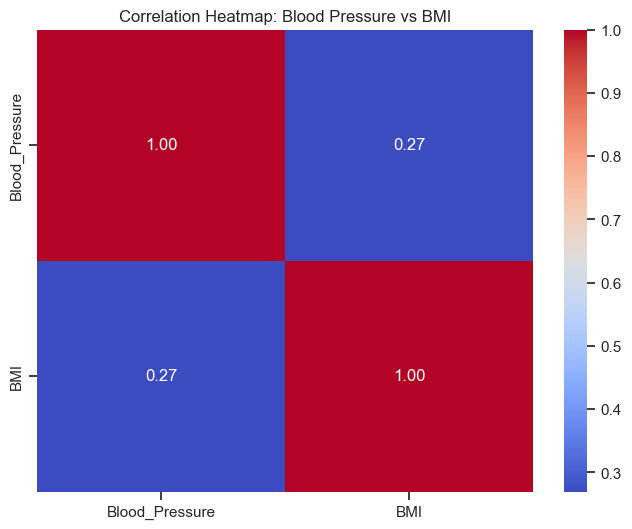

In [50]:
#Correlation between Blood pressure and BMI
#columns for correlation
columns = ['Blood_Pressure', 'BMI']

# Calculate correlation matrix for the selected columns
correlation_matrix = Train_data[columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Blood Pressure vs BMI')
plt.show()


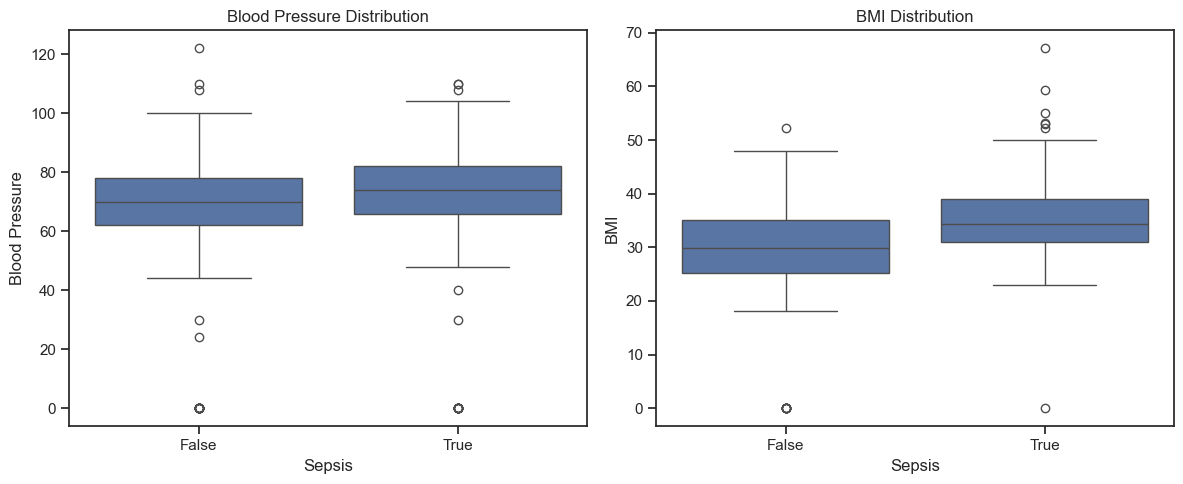

In [44]:
# Comparison of Blood Pressure and BMI Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Target_Sepsis', y='Blood_Pressure', data=Train_data, ax=axes[0])
axes[0].set_title('Blood Pressure Distribution')
axes[0].set_xlabel('Sepsis')
axes[0].set_ylabel('Blood Pressure')

sns.boxplot(x='Target_Sepsis', y='BMI', data=Train_data, ax=axes[1])
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('Sepsis')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

### Multivariate Analysis

<Figure size 1200x800 with 0 Axes>

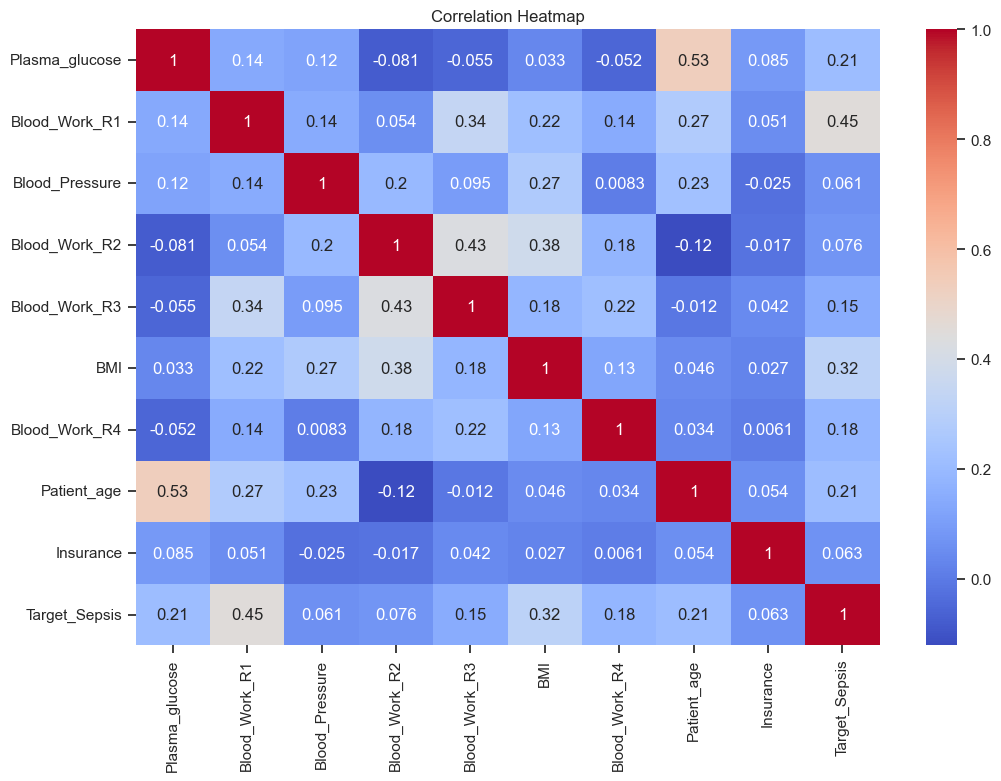

In [47]:
#Drop ID column before ploting heatmap
Train_data.drop(columns=['ID'], inplace=True)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

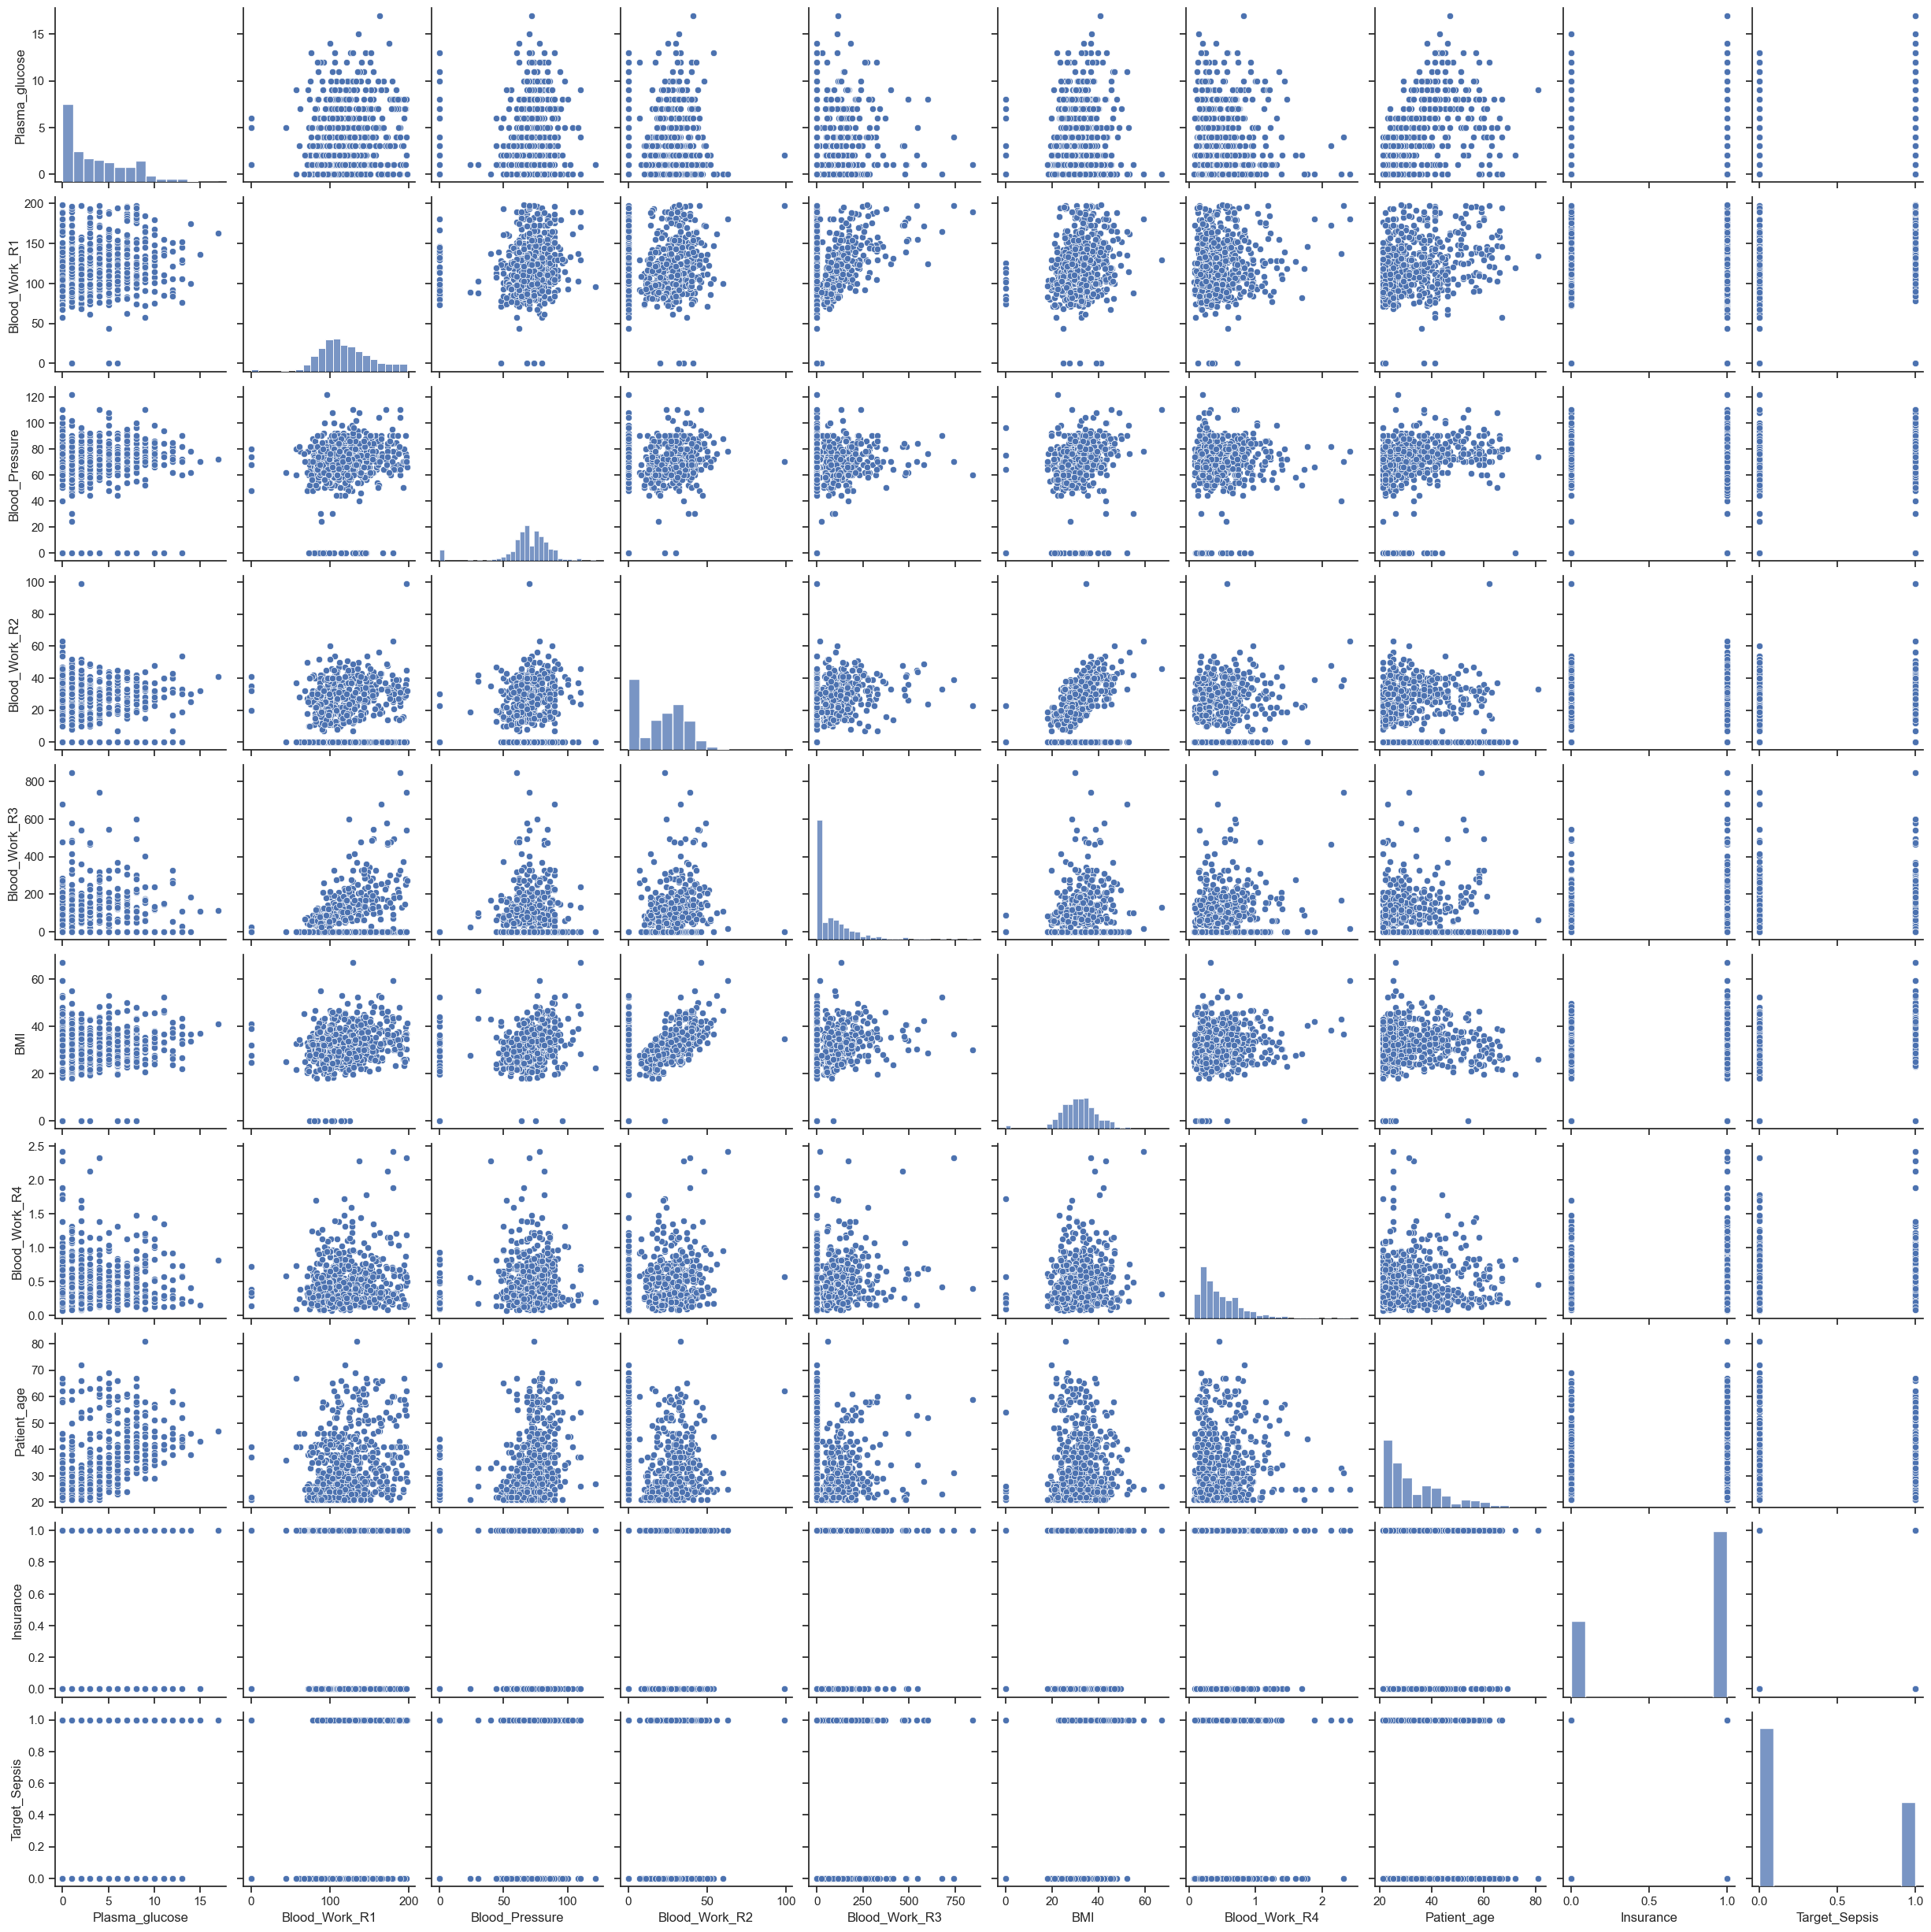

In [45]:
# Pairplot
sns.pairplot(Train_data)
plt.show()


## Hypothesis Testing


In [51]:
# Split the data into sepsis and non-sepsis groups
sepsis_group = Train_data[Train_data['Target_Sepsis'] == True]
non_sepsis_group = Train_data[Train_data['Target_Sepsis'] == False]

**Perform statistical tests:**

*We use independent two-sample t-tests to compare the means of Blood_Pressure and BMI between the sepsis and non-sepsis groups. However, before applying the t-test, we need to check if the data meets the assumptions of normality and homogeneity of variances.*

In [54]:


# Check normality assumption
_, sepsis_pressure_norm = stats.shapiro(sepsis_group['Blood_Pressure'])
_, non_sepsis_pressure_norm = stats.shapiro(non_sepsis_group['Blood_Pressure'])
_, sepsis_bmi_norm = stats.shapiro(sepsis_group['BMI'])
_, non_sepsis_bmi_norm = stats.shapiro(non_sepsis_group['BMI'])

In [55]:
# Check homogeneity of variances
_, pressure_var_equal = stats.levene(sepsis_group['Blood_Pressure'], non_sepsis_group['Blood_Pressure'])
_, bmi_var_equal = stats.levene(sepsis_group['BMI'], non_sepsis_group['BMI'])

In [56]:
# Perform t-tests
if sepsis_pressure_norm > 0.05 and non_sepsis_pressure_norm > 0.05 and pressure_var_equal > 0.05:
    t_stat_pressure, p_val_pressure = stats.ttest_ind(sepsis_group['Blood_Pressure'], non_sepsis_group['Blood_Pressure'])
else:
    t_stat_pressure, p_val_pressure = stats.mannwhitneyu(sepsis_group['Blood_Pressure'], non_sepsis_group['Blood_Pressure'])

if sepsis_bmi_norm > 0.05 and non_sepsis_bmi_norm > 0.05 and bmi_var_equal > 0.05:
    t_stat_bmi, p_val_bmi = stats.ttest_ind(sepsis_group['BMI'], non_sepsis_group['BMI'])
else:
    t_stat_bmi, p_val_bmi = stats.mannwhitneyu(sepsis_group['BMI'], non_sepsis_group['BMI'])

In [57]:
# Print the results
print(f"Blood Pressure Test Results:")
print(f"t-statistic: {t_stat_pressure:.4f}, p-value: {p_val_pressure:.4f}")
print(f"\nBMI Test Results:")
print(f"t-statistic: {t_stat_bmi:.4f}, p-value: {p_val_bmi:.4f}")

Blood Pressure Test Results:
t-statistic: 47673.5000, p-value: 0.0005

BMI Test Results:
t-statistic: 56864.0000, p-value: 0.0000


**Given the extremely low p-values for both tests, there is robust evidence to support the hypothesis that there are significant differences in both Blood Pressure and BMI between patients with and without sepsis. Further analysis could involve exploring the magnitude of these differences and their clinical implications.**

## Analytical Questions 

**1. How does Plasma Glucose vary between patients with and without sepsis?**

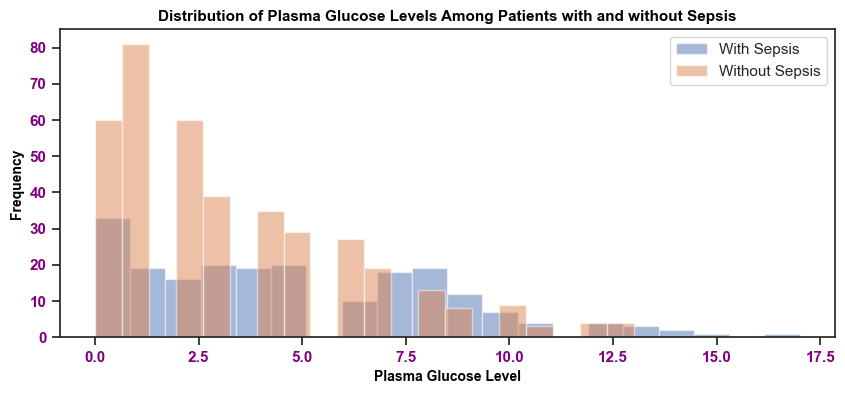

In [59]:
# Split the data into sepsis and non-sepsis groups
sepsis_group = Train_data[Train_data['Target_Sepsis'] == True]
non_sepsis_group = Train_data[Train_data['Target_Sepsis'] == False]

# Plot a histogram for plasma glucose levels
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
plt.hist(sepsis_group["Plasma_glucose"], bins=20, alpha=0.5, label="With Sepsis")
plt.hist(non_sepsis_group["Plasma_glucose"], bins=20, alpha=0.5, label="Without Sepsis")

# Add labels and Title
plt.xlabel("Plasma Glucose Level", color="black", fontsize=10, fontweight="bold")
plt.ylabel("Frequency", color="black", fontsize=10, fontweight="bold")
plt.title("Distribution of Plasma Glucose Levels Among Patients with and without Sepsis", color="black", fontsize=11, fontweight="bold")
plt.xticks(color="purple", fontweight="bold")
plt.yticks(color="purple", fontweight="bold")
plt.legend()
plt.show()


*From the graph above, the higher the plasma glucose level the higher the risk of the patient with Sepsis*

In [62]:
# Perform independent samples t-test
statistic, p_value = ttest_ind(sepsis_group["Plasma_glucose"], non_sepsis_group["Plasma_glucose"])

# Print the results
print("Independent Samples T-test:")
print(f"Statistic: {statistic:.2f}")
print(f"P_value: {p_value:.2f}")

#Interprete the results
if p_value <=0.01:
    print("Since p_value <=0.01, there is a significant difference in plasma glucose levels between patients with and without Sepsis")
else:
    print("There is no significant difference in plasma glucose levels betweeen patients with and without Sepsis")

Independent Samples T-test:
Statistic: 5.17
P_value: 0.00
Since p_value <=0.01, there is a significant difference in plasma glucose levels between patients with and without Sepsis


**2. Are there Patterns or Thresholds in Blood Work Results Associated with Sepsis**

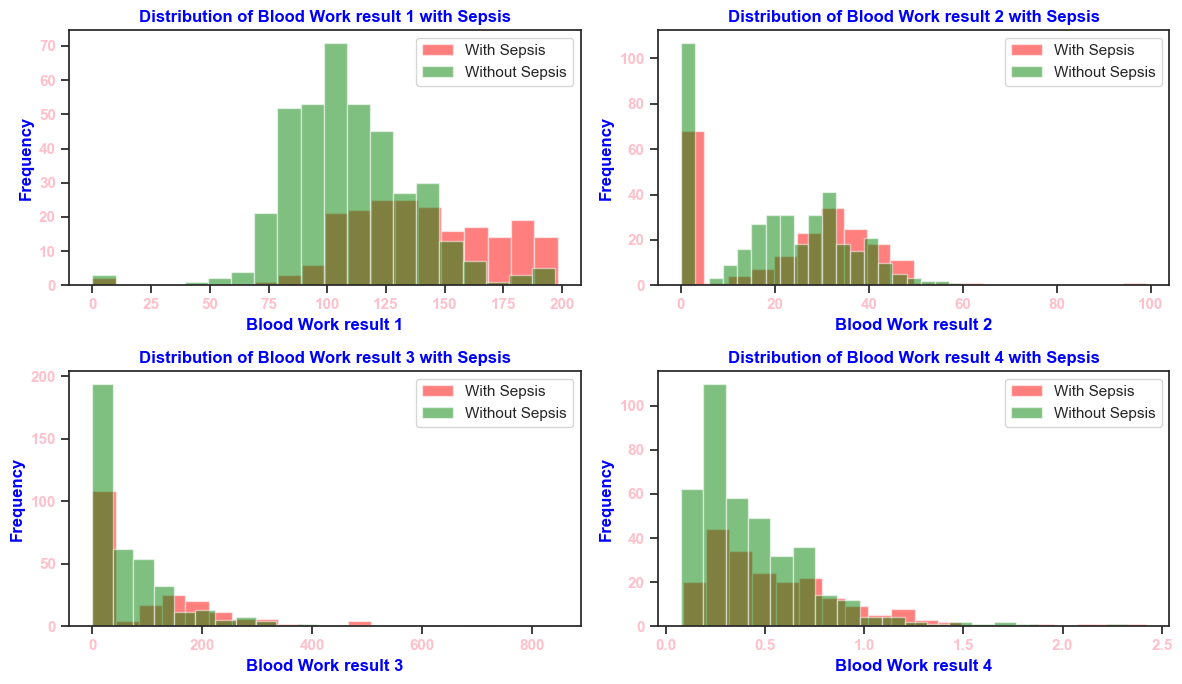

In [63]:
# Select relevant columns
blood_work_columns = ["Blood_Work_R1", "Blood_Work_R2", "Blood_Work_R3", "Blood_Work_R4", "Target_Sepsis"]
blood_work_data = Train_data[blood_work_columns]

# Separate data by Sepsis status
sepsis_group = blood_work_data[blood_work_data["Target_Sepsis"]==True]
non_sepsis_group = blood_work_data[blood_work_data["Target_Sepsis"]==False]

plt.figure(figsize=(12, 7)) # Plot histogram for each blood work result
for i, col in enumerate(blood_work_columns[:-1]):
    plt.subplot(2, 2, i+1)
    plt.hist(sepsis_group[col], bins=20, alpha=0.5, color="red", label="With Sepsis")
    plt.hist(non_sepsis_group[col], bins=20, alpha=0.5, color="green", label="Without Sepsis")
    plt.xticks(color="pink", fontweight="bold")
    plt.yticks(color="pink", fontweight="bold")
    plt.xlabel(f"Blood Work result {i+1}", color="blue", fontweight="bold")
    plt.ylabel("Frequency", color="blue", fontweight="bold")
    plt.title(f"Distribution of Blood Work result {i+1} with Sepsis", color="blue", fontweight="bold")
    plt.legend()

plt.tight_layout()
plt.show()


In [64]:
# Perform Independent Samples t-test
print(f"Independent Samples T-test")
for i, col in enumerate(blood_work_columns[:-1]):
    statistic, p_value = ttest_ind(sepsis_group[col], non_sepsis_group[col])
    print(f"For blood work results-{i+1}; T-Statistic = {statistic:.2f} and P-value = {p_value:.2f}") # Print the results
    if p_value <= 0.01: # Interprete the results
        print(f"==> Since p_value <=0.01, there is a significant difference in blood work results-{i+1} between patients with and without Sepeis")
    else:
        print(f"==> There is no significant difference in blood work results-{i+1} between patients with and without Sepsis")

Independent Samples T-test
For blood work results-1; T-Statistic = 12.30 and P-value = 0.00
==> Since p_value <=0.01, there is a significant difference in blood work results-1 between patients with and without Sepeis
For blood work results-2; T-Statistic = 1.85 and P-value = 0.06
==> There is no significant difference in blood work results-2 between patients with and without Sepsis
For blood work results-3; T-Statistic = 3.60 and P-value = 0.00
==> Since p_value <=0.01, there is a significant difference in blood work results-3 between patients with and without Sepeis
For blood work results-4; T-Statistic = 4.51 and P-value = 0.00
==> Since p_value <=0.01, there is a significant difference in blood work results-4 between patients with and without Sepeis


**3. Are there any differences in the distribution of Insurance coverage between patients with and without sepsis?**

In [76]:
# Create stacked bar chart for Insurance coverage by Sepsis Status
stacked_bar_insurance = alt.Chart(Train_data).mark_bar().encode(
    x=alt.X('Insurance:O', title='Insurance'),
    y=alt.Y('count()', title='Count'),
    color=alt.Color('Target_Sepsis:N', title='Sepsis Status')
).properties(
    width=600,
    height=400,
    title='Distribution of Insurance Coverage by Sepsis Status'
)

stacked_bar_insurance

alt.Chart(...)

**4. How does the distribution of Blood Pressure vary between patients with and without sepsis?**

In [80]:
# Create side-by-side histogram for Blood Pressure
histogram = alt.Chart(Train_data).mark_bar().encode(
    x=alt.X('Blood_Pressure:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Target_Sepsis:N'
).properties(
    width=500,  # Increase width to 500
    height=300, # Increase height to 300
    title='Distribution of Blood Pressure by Sepsis Status'
)

histogram

alt.Chart(...)

**5. What is the distribution of Body Mass Index (BMI) and Age for patients with and without sepsis?**

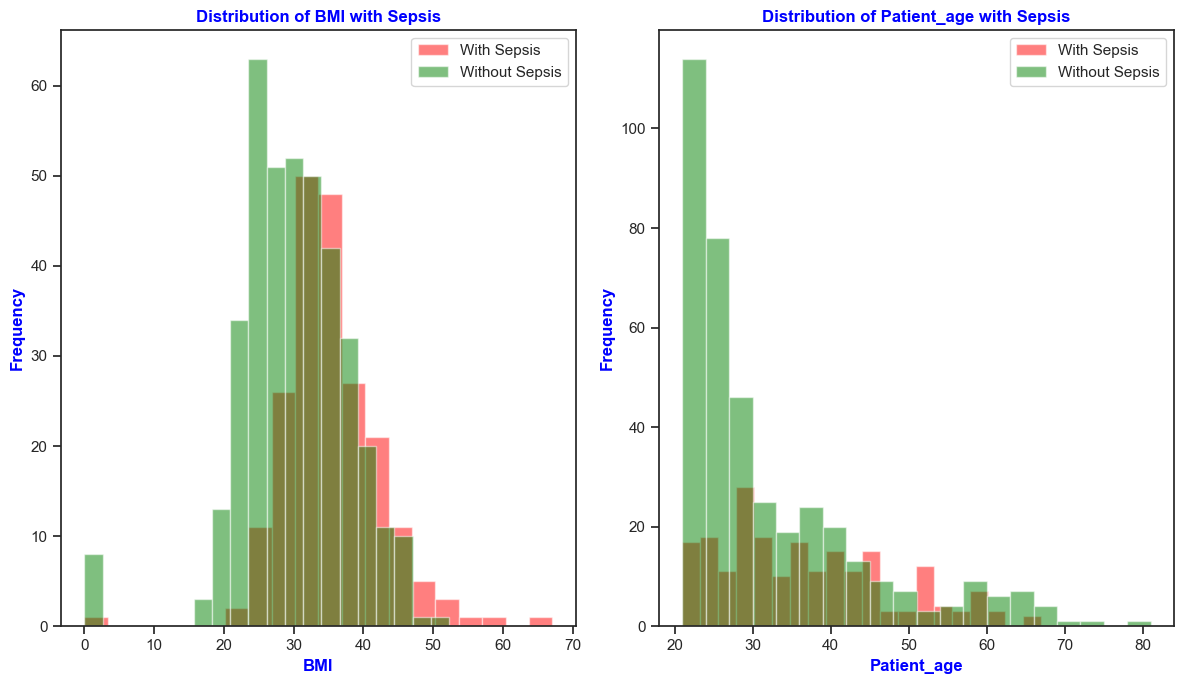

In [79]:
# Select relevant columns (Body Mass Index and Age)
comparison_columns = ["BMI", "Patient_age", "Target_Sepsis"]
comparison_data = Train_data[comparison_columns]

# Separate data with Sepsis as True
sepsis_group = comparison_data[comparison_data["Target_Sepsis"] == True]

# Separate data with Sepsis as False
non_sepsis_group = comparison_data[comparison_data["Target_Sepsis"] == False]

plt.figure(figsize=(12, 7))  # figure size
for i, col in enumerate(comparison_columns[:-1]):  # Plot histogram for BMI and Age
    plt.subplot(1, 2, i+1)
    plt.hist(sepsis_group[col], bins=20, alpha=0.5, color="red", label="With Sepsis")
    plt.hist(non_sepsis_group[col], bins=20, alpha=0.5, color="green", label="Without Sepsis")
    plt.xlabel(col, color="blue", fontweight="bold")
    plt.ylabel("Frequency", color="blue", fontweight="bold")
    plt.title(f"Distribution of {col} with Sepsis", color="blue", fontweight="bold")
    plt.legend()

plt.tight_layout()
plt.show()

In [166]:
print("Independent Samples T-test")
for col in ["BMI", "Patient_age"]:
    statistic, p_value = ttest_ind(sepsis_group[col], non_sepsis_group[col])
    # Print the results
    print(f"For {col}: T-Statistic = {statistic:.2f} and P-value = {p_value:.2f}")  
    # Interpret the results
    if p_value <= 0.01:  
        print(f"==> Since p-value <= 0.01, there is a significant difference in {col} between patients with and without Sepsis")
    else:
        print(f"==> There is no significant difference in {col} between patients with and without Sepsis")


Independent Samples T-test
For BMI: T-Statistic = 8.13 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in BMI between patients with and without Sepsis
For Patient_age: T-Statistic = 5.25 and P-value = 0.00
==> Since p-value <= 0.01, there is a significant difference in Patient_age between patients with and without Sepsis


## DATA PREPARTION


In [177]:
# Replace zeros in each column with the median value
columns_with_zeros = ['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI', 'Blood_Work_R4']
for col in columns_with_zeros:
    median_val = Train_data[col].median()
    Train_data[col] = Train_data[col].replace(0, median_val)

### **Split the Data into Training and Validation Sets** ###

In [180]:
# Separate features and target
X = Train_data.drop('Target_Sepsis', axis=1)
y = Train_data['Target_Sepsis']



In [181]:
#To view X datatypes
X.dtypes

Plasma_glucose      int64
Blood_Work_R1       int64
Blood_Pressure      int64
Blood_Work_R2       int64
Blood_Work_R3       int64
BMI               float64
Blood_Work_R4     float64
Patient_age         int64
Insurance           int64
dtype: object

In [182]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Create a Preprocessor 

In [183]:
# Define the numeric columns and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Creating a pipeline
numeric_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),  # Corrected the extra space after 'scaler'
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_transformations', numeric_pipeline, numeric_columns),
        ('cat_transformations', categorical_pipeline, categorical_columns)
    ]
)



In [184]:
#View numeric columns
numeric_columns

Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')

In [185]:
#View categorical columns
categorical_columns

Index([], dtype='object')

## Label Encoding

In [186]:
#Passing the pipeline through X 
#X_processed = pipeline.fit_transform(X)

#Encode tagert variable with label encoder
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(y_train)
y_test_encoded = LabelEncoder.transform(y_test)


In [201]:
# Instantiate models and train them with unbalanced data
models = [
    ('LR_model',LogisticRegression(random_state=42)),
    ('RF_model',RandomForestClassifier(random_state=42)),
    ('GNB_model',GaussianNB()),
    ('GB_model',GradientBoostingClassifier(random_state=42))
]

# Define the metrics to be fetched
metrics = []
for model, classifier in models:
    pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('Classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
   

    # Predict on the X_test
    y_pred = pipeline.predict(X_test)





    # Calculate the metrics
    acc = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    roc = roc_auc_score(y_test_encoded, y_pred)
    pr = precision_score(y_test_encoded, y_pred)
    rc = recall_score(y_test_encoded, y_pred)

# Append the metrics to the list
    metrics.append({
        "Model": model,
        "Accuracy Score": acc,
        "F1 Score": f1,
        "ROC AUC Score": roc,
        "Precision Score": pr,
        "Recall Score": rc
    })

# Instantiate PrettyTable with the column names
table = PrettyTable()
table.field_names = ["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Precision Score", "Recall Score"]

# Add rows to the table
for metric in metrics:
    table.add_row([
        metric["Model"], 
        metric["Accuracy Score"], 
        metric["F1 Score"], 
        metric["ROC AUC Score"], 
        metric["Precision Score"], 
        metric["Recall Score"]
    ])

# Print the table
print(table)


+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Model   |   Accuracy Score   |      F1 Score      |   ROC AUC Score    |  Precision Score   |    Recall Score    |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  LR_model |       0.725        | 0.6206896551724138 | 0.706043956043956  |        0.6         | 0.6428571428571429 |
|  RF_model | 0.7166666666666667 | 0.6046511627906977 | 0.6941391941391941 | 0.5909090909090909 | 0.6190476190476191 |
| GNB_model | 0.6833333333333333 | 0.5681818181818181 | 0.6630036630036631 | 0.5434782608695652 | 0.5952380952380952 |
|  GB_model |       0.725        | 0.6024096385542169 | 0.6950549450549451 | 0.6097560975609756 | 0.5952380952380952 |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+


## Balancing Dataset

In [203]:
#Balancing with Smote
Smote_sampler = SMOTE(random_state=42)


In [210]:
# Instantiate models and train them with unbalanced data
models = [
    ('LR_model',LogisticRegression(random_state=42)),
    ('RF_model',RandomForestClassifier(random_state=42)),
    ('GNB_model',GaussianNB()),
    ('GB_model',GradientBoostingClassifier(random_state=42))
]

smote_pipeline = {}




# Define the metrics to be fetched
metrics = []
for model, classifier, in models:
    Smote_pipeline = imblearn_pipeline([
        ('Smote_sampler', Smote_sampler),
        ('preprocessor',preprocessor),
        ('Classifier', classifier)
    ])
    Smote_pipeline.fit(X_train, y_train_encoded)
    smote_pipeline[model] = Smote_pipeline
   

    # Predict on the X_test
    y_pred = Smote_pipeline.predict(X_test)

    
    # Calculate the metrics
    acc = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    roc = roc_auc_score(y_test_encoded, y_pred)
    pr = precision_score(y_test_encoded, y_pred)
    rc = recall_score(y_test_encoded, y_pred)

# Append the metrics to the list
    metrics.append({
        "Model": model,
        "Accuracy Score": acc,
        "F1 Score": f1,
        "ROC AUC Score": roc,
        "Precision Score": pr,
        "Recall Score": rc
    })
    # Instantiate PrettyTable with the column names
table = PrettyTable()
table.field_names = ["Model", "Accuracy Score", "F1 Score", "ROC AUC Score", "Precision Score", "Recall Score"]

# Add rows to the table
for metric in metrics:
    table.add_row([
        metric["Model"], 
        metric["Accuracy Score"], 
        metric["F1 Score"], 
        metric["ROC AUC Score"], 
        metric["Precision Score"], 
        metric["Recall Score"]
    ])

# Print the table
print(table)

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Model   |   Accuracy Score   |      F1 Score      |   ROC AUC Score    |  Precision Score   |    Recall Score    |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  LR_model | 0.7083333333333334 | 0.6391752577319588 | 0.7152014652014652 | 0.5636363636363636 | 0.7380952380952381 |
|  RF_model | 0.7416666666666667 | 0.6593406593406593 | 0.7353479853479854 | 0.6122448979591837 | 0.7142857142857143 |
| GNB_model | 0.6666666666666666 | 0.5652173913043478 | 0.6556776556776557 |        0.52        | 0.6190476190476191 |
|  GB_model |       0.725        | 0.6206896551724138 | 0.706043956043956  |        0.6         | 0.6428571428571429 |
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+


In [109]:
# # Instantiate GaussianNB model
# gaussian_nb = GaussianNB()

# # Fit the model
# gaussian_nb.fit(X_train, y_train)

GaussianNB()

## HYPERPARAMETER TUNING

In [215]:
#Check for balanced models pipeline
LR_Pipeline = smote_pipeline['LR_model'] 
RF_Pipeline = smote_pipeline['RF_model']
GB_Pipeline = smote_pipeline['GB_model']

In [221]:
# Define hyperparameters for each model
logistic_regression_params = {
    'Classifier__C': [0.1, 1, 10, 100],
    'Classifier__penalty': ['l1', 'l2'],
    'Classifier__solver': ['liblinear']  # Use 'liblinear' solver for 'l1' penalty
}

random_forest_params = {
    'Classifier__n_estimators': [100, 200, 300],
    'Classifier__max_depth': [None, 10, 20],
    'Classifier__min_samples_split': [2, 5, 10],
    'Classifier__min_samples_leaf': [1, 2, 4]
}

gradient_boosting_params = {
    'Classifier__n_estimators': [100, 200, 300],
    'Classifier__learning_rate': [0.01, 0.1, 1],
    'Classifier__max_depth': [3, 4, 5]
}
# Define the models with hyperparameter search
logistic_regression_grid = GridSearchCV(LR_Pipeline, logistic_regression_params,cv=5, scoring='accuracy') 
random_forest_grid = GridSearchCV(RF_Pipeline, random_forest_params, cv=5, scoring='accuracy')
gradient_boosting_grid = GridSearchCV(GB_Pipeline, gradient_boosting_params, cv=5, scoring='accuracy')

# Fit the models with hyperparameter search
logistic_regression_grid.fit(X_train, y_train_encoded)
random_forest_grid.fit(X_train, y_train_encoded)
gradient_boosting_grid.fit(X_train, y_train_encoded)

# Create PrettyTable instances
logistic_regression_table = PrettyTable()
random_forest_table = PrettyTable()
gradient_boosting_table = PrettyTable()

# Add columns to the tables
logistic_regression_table.field_names = ["Model", "Best Params", "Best Score"]
random_forest_table.field_names = ["Model", "Best Params", "Best Score"]
gradient_boosting_table.field_names = ["Model", "Best Params", "Best Score"]

# Add rows to the tables
logistic_regression_table.add_row(["Logistic Regression", logistic_regression_grid.best_params_, logistic_regression_grid.best_score_])
random_forest_table.add_row(["Random Forest", random_forest_grid.best_params_, random_forest_grid.best_score_])
gradient_boosting_table.add_row(["Gradient Boosting", gradient_boosting_grid.best_params_, gradient_boosting_grid.best_score_])

# Print the tables
print("Logistic Regression Results:")
print(logistic_regression_table)
print("\nRandom Forest Results:")
print(random_forest_table)
print("\nGradient Boosting Results:")
print(gradient_boosting_table)

Logistic Regression Results:
+---------------------+---------------------------------------------------------------------------------------+--------------------+
|        Model        |                                      Best Params                                      |     Best Score     |
+---------------------+---------------------------------------------------------------------------------------+--------------------+
| Logistic Regression | {'Classifier__C': 10, 'Classifier__penalty': 'l1', 'Classifier__solver': 'liblinear'} | 0.7474780701754385 |
+---------------------+---------------------------------------------------------------------------------------+--------------------+

Random Forest Results:
+---------------+---------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|     Model     |                                                              Best Params                 

In [222]:
# Define the results of each model
logistic_regression_best_score = 0.7474
random_forest_best_score = 0.7767
gradient_boosting_best_score =  0.7641
naive_bayes_best_score = 0.67  # Provided score for Naive Bayes

# Create a dictionary to store model names and their best scores
models_scores = {
    "Logistic Regression": logistic_regression_best_score,
    "Random Forest": random_forest_best_score,
    "Gradient Boosting": gradient_boosting_best_score,
    "Naive Bayes": naive_bayes_best_score
}

# Sort the models based on their scores (descending order)
sorted_models = sorted(models_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top three models
top_three_models = sorted_models[:3]

# Print the top three models
print("Top Three Models:")
for model, score in top_three_models:
    print(f"{model}: Best Score = {score}")

Top Three Models:
Random Forest: Best Score = 0.7767
Gradient Boosting: Best Score = 0.7641
Logistic Regression: Best Score = 0.7474


## Model Persistence

In [223]:
# Assuming you have already defined the models as logistic_regression_grid, random_forest_grid, and gradient_boosting_grid

# Get the best estimators from the grid search
logisticR_model = logistic_regression_grid.best_estimator_
randomF_model = random_forest_grid.best_estimator_
gradientM_model = gradient_boosting_grid.best_estimator_

# Save the models to disk
joblib.dump(logisticR_model, './Models/LogisticR_model.joblib')
joblib.dump(randomF_model, './Models/RandomF_model.joblib')
joblib.dump(gradientM_model, './Models/GradientM_model.joblib')

print("Models saved successfully.")

Models saved successfully.


In [224]:
#Save label encoder 
joblib.dump(LabelEncoder, './Models/encoder.joblib')

['./Models/encoder.joblib']

### ROC Curve For Models

In [234]:
# Fit the models on the training data
logisticR_model.fit(X_train, y_train_encoded)
randomF_model.fit(X_train, y_train_encoded)
gradientM_model.fit(X_train, y_train_encoded)

# Convert labels to binary format
y_test_binary = (y_test == 'Positive').astype(int)

# Predict probabilities for the test data
logisticR_probs = logisticR_model.predict_proba(X_test)[:, 1]
randomF_probs = randomF_model.predict_proba(X_test)[:, 1]
gradientM_probs = gradientM_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score for each model
logisticR_fpr, logisticR_tpr, _ = roc_curve(y_test_binary, logisticR_probs)
randomF_fpr, randomF_tpr, _ = roc_curve(y_test_binary, randomF_probs)
gradientM_fpr, gradientM_tpr, _ = roc_curve(y_test_binary, gradientM_probs)

logisticR_auc = roc_auc_score(y_test, logisticR_probs)
randomF_auc = roc_auc_score(y_test, randomF_probs)
gradientM_auc = roc_auc_score(y_test, gradientM_probs)

# Create DataFrame for ROC curves
roc_data = pd.concat([
    pd.DataFrame({'FPR': logisticR_fpr, 'TPR': logisticR_tpr, 'Model': 'Logistic Regression'}),
    pd.DataFrame({'FPR': randomF_fpr, 'TPR': randomF_tpr, 'Model': 'Random Forest'}),
    pd.DataFrame({'FPR': gradientM_fpr, 'TPR': gradientM_tpr, 'Model': 'Gradient Boosting'})
])

# Plot ROC curves using Altair
roc_curve_plot = alt.Chart(roc_data).mark_line().encode(
    x=alt.X('FPR', title='False Positive Rate'),
    y=alt.Y('TPR', title='True Positive Rate'),
    color=alt.Color('Model', title='Model'),
    tooltip=['Model', 'FPR', 'TPR']
).properties(
    title='ROC Curve for Sepsis Prediction Models'
)

# Add AUC scores to the plot
auc_scores = alt.Chart(pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
                                     'AUC Score': [logisticR_auc, randomF_auc, gradientM_auc]})).mark_text(
    align='left', baseline='middle', dx=5
).encode(
    x=alt.value(1),  # Pixels from the left of the plot
    y=alt.Y('AUC Score', title='AUC Score'),
    text='AUC Score',
       color='Model'
)

roc_curve_plot + auc_scores

alt.LayerChart(...)

## Classification Report

In [ ]:
# Predictions for each model
logisticR_preds = logisticR_model.predict(X_test)
randomF_preds = randomF_model.predict(X_test)
gradientM_preds = gradientM_model.predict(X_test)

# Generate classification reports
logisticR_report = classification_report(y_test, logisticR_preds)
randomF_report = classification_report(y_test, randomF_preds)
gradientM_report = classification_report(y_test, gradientM_preds)

print("Logistic Regression Classification Report:")
print(logisticR_report)

print("\nRandom Forest Classification Report:")
print(randomF_report)

print("\nGradient Boosting Classification Report:")
print(gradientM_report)

## Load Test Dataset

In [237]:
#Load and show test dataset
test_data = pd.read_csv("./Dataset/Paitients_Files_Test.csv")
test_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [248]:
#Rename column names to fit column names in train dataset
test_data = test_data.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target_Sepsis"
})

#Check if columns have been renamed
test_data.head()

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1
2,6,96,0,0,0,23.7,0.190,28,1
3,1,124,74,36,0,27.8,0.100,30,1
4,7,150,78,29,126,35.2,0.692,54,0


In [239]:
#Drop 'ID' column
test_data.drop('ID', axis=1, inplace= True)

In [240]:
#Check for shape of test dataset
test_data.shape

(169, 9)

In [241]:
#Check info of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma_glucose  169 non-null    int64  
 1   Blood_Work_R1   169 non-null    int64  
 2   Blood_Pressure  169 non-null    int64  
 3   Blood_Work_R2   169 non-null    int64  
 4   Blood_Work_R3   169 non-null    int64  
 5   BMI             169 non-null    float64
 6   Blood_Work_R4   169 non-null    float64
 7   Patient_age     169 non-null    int64  
 8   Insurance       169 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 12.0 KB


In [ ]:
#import joblib

# Assuming test_encoder is a label encoder and LR_prediction contains the predicted labels
# LR_prediction =  LR_model.predict(test_data)  # Your predicted labels
# test_encoder = joblib.load('./Models/encoder.joblib')

# # Inverse transform the predicted labels
# LR_predict = test_encoder.inverse_transform(LR_prediction)

# # Print predictions
# print('LR_prediction:', LR_predict)


In [258]:
#Load pretrained models and encoder models
LR_model= joblib.load('./Models/LogisticR_model.joblib')
test_encoder = joblib.load('./Models/encoder.joblib')


LR_prediction = LR_model.predict(test_data)
#LR_predict = test_encoder.inverse_transform(LR_prediction)

#Print predictions
#print('LR_prediction:', LR_predict)
LR_prediction


array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])